# Credit Card Default Prediction

## Table of contents
1. [Problem Statement](#pbm_stmt) <br>
2. [Data Set Definition](#ds_defn) <br>
   - 2.1 [Features of data](#features_defn)<br>
4. [Importing packages and dataset](#import_pkg_ds)<br>
5. [EDA](#eda)
   - 5.1 [Basic Analyses](#basicanalyses)<br>
   - 5.2 [Pandas Profiling](#pandasprofiling)<br>
6. [X & y Split](#xysplit)<br>
7. [Before PCA](#beforepca)<br>
    - 7.1 [Random Forest](#bpca_rfc)<br>
    - 7.2 [Logistic Regression](#bpca_logreg)<br>
    - 7.3 [Gaussian Naive Bayes](#bpca_gnb)<br>
    - 7.4 [Grid Search CV - Decision Trees](#bpca_cvdt)<br>
    - 7.5 [K-Nearest Neighbors](#bpca_knn)<br>
    - 7.6 [Support Vector Classifier](#bpca_svc)<br>
8. [Implementing PCA](#pcatry)<br>
    - 8.1 [Logistic Regression](#apca_logreg)<br>
    - 8.2 [Random Forest Classifier](#apca_rfc)<br>
    - 8.3 [Support Vector Classifier](#apca_svc)<br>
    - 8.4 [Decision Tree - Grid Search](#apca_cvdt)<br>
    - 8.5 [Gaussian NB](#apca_gnb)<br>
    - 8.6 [K-Nearest Neighbor](#apca_knn)<br>
9. [Assessing feature importance](#vbleimp)<br>
10. [Conclusion](#conclusion)<br>

<a id = pbm_stmt></a>
### Problem Statement

- To predict result of a direct marketing campaign launched by a Portuguese bank to its customers, for selling its latest deposit products. Given the way and depth of marketing call to each customer, we should predict on what basis a customer is choosing the deposit or dropping the same.

<a id=ds_defn></a>
### Dataset Definition

- Dataset contains of 45000 records and 20 explanatory features. Target variable would a binary yes|no, which is the result of the call/campaign. Basically a classification problem to predict the conversion in the campaign and factors influencing decisions of customer.

<a id=features_defn></a>
### Features of data

#### Bank client data:
1 - age (numeric)<br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>
#### Related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')<br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>
#### Other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>
#### Social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric)<br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)<br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)<br>
#### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')<br>

<a id = import_pkg_ds></a>
### Import Packages and Dataset

#### Importing packages

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from datetime import datetime as dt
from matplotlib.legend_handler import HandlerLine2D
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

import category_encoders as ce
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC

%matplotlib inline
sns.set()

In [2]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)
pd.set_option('display.width',1000)

#### Importing Data set

In [3]:
portDF = pd.read_csv('bank-additional-full.csv',sep=';')

In [4]:
portDF

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<a id = eda></a>
### Data Analysis & Exploration

<a id = basicanalyses></a>
#### Basic Analyses
- We are looking for types of variables & null values through info(). We should find out cat variable which are in numeric form and should convert them appropriately
- Using describe() we will observe how continuous variables are distributed and if there is any variable to be derived using the continuous variables
- We will also export Pandas Profiling report pre and post data munging to see the effect

In [5]:
portDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [6]:
portDF.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
portDF.columns = portDF.columns.str.lower()
portDF.columns = portDF.columns.str.replace('.','_')
portDF.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'], dtype='object')

In [8]:
#Following are cat variables. We should do a thorough analysis on how this affects the customers' decision
#to buy a deposit. We will plot them against 'y' variable in our visualization section
ser1 = portDF['emp_var_rate'].unique()
ser2 = portDF['cons_price_idx'].unique()
ser3 = portDF['cons_conf_idx'].unique()
ser4 = portDF['euribor3m'].unique()
ser5 = portDF['nr_employed'].unique()
print("emp_var_rate \n",ser1)
print("cons_price_idx \n",ser2)
print("cons_conf_idx \n",ser3)
print("euribor3m \n",ser4)
print("nr_employed \n",ser5)

emp_var_rate 
 [ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
cons_price_idx 
 [93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.601 94.767]
cons_conf_idx 
 [-36.4 -41.8 -42.7 -36.1 -40.4 -42.  -45.9 -50.  -47.1 -46.2 -40.8 -33.6
 -31.4 -29.8 -26.9 -30.1 -33.  -34.8 -34.6 -40.  -39.8 -40.3 -38.3 -37.5
 -49.5 -50.8]
euribor3m 
 [4.857 4.856 4.855 4.859 4.86  4.858 4.864 4.865 4.866 4.967 4.961 4.959
 4.958 4.96  4.962 4.955 4.947 4.956 4.966 4.963 4.957 4.968 4.97  4.965
 4.964 5.045 5.    4.936 4.921 4.918 4.912 4.827 4.794 4.76  4.733 4.7
 4.663 4.592 4.474 4.406 4.343 4.286 4.245 4.223 4.191 4.153 4.12  4.076
 4.021 3.901 3.879 3.853 3.816 3.743 3.669 3.563 3.488 3.428 3.329 3.282
 3.053 1.811 1.799 1.778 1.757 1.726 1.703 1.687 1.663 1.65  1.64  1.629
 1.614 1.602 1.584 1.574 1.56  1.556 1.548 1.538 1.531 1.52  1.51  1.498
 1.483 1.479 1.466 1.453 1.445 1.

In [9]:
ser4

array([4.857, 4.856, 4.855, 4.859, 4.86 , 4.858, 4.864, 4.865, 4.866,
       4.967, 4.961, 4.959, 4.958, 4.96 , 4.962, 4.955, 4.947, 4.956,
       4.966, 4.963, 4.957, 4.968, 4.97 , 4.965, 4.964, 5.045, 5.   ,
       4.936, 4.921, 4.918, 4.912, 4.827, 4.794, 4.76 , 4.733, 4.7  ,
       4.663, 4.592, 4.474, 4.406, 4.343, 4.286, 4.245, 4.223, 4.191,
       4.153, 4.12 , 4.076, 4.021, 3.901, 3.879, 3.853, 3.816, 3.743,
       3.669, 3.563, 3.488, 3.428, 3.329, 3.282, 3.053, 1.811, 1.799,
       1.778, 1.757, 1.726, 1.703, 1.687, 1.663, 1.65 , 1.64 , 1.629,
       1.614, 1.602, 1.584, 1.574, 1.56 , 1.556, 1.548, 1.538, 1.531,
       1.52 , 1.51 , 1.498, 1.483, 1.479, 1.466, 1.453, 1.445, 1.435,
       1.423, 1.415, 1.41 , 1.405, 1.406, 1.4  , 1.392, 1.384, 1.372,
       1.365, 1.354, 1.344, 1.334, 1.327, 1.313, 1.299, 1.291, 1.281,
       1.266, 1.25 , 1.244, 1.259, 1.264, 1.27 , 1.262, 1.26 , 1.268,
       1.286, 1.252, 1.235, 1.224, 1.215, 1.206, 1.099, 1.085, 1.072,
       1.059, 1.048,

In [10]:
portDF['euribor3m']=portDF['euribor3m'].astype('float64')

In [11]:
#These variables are about results of previous campaigns or history of customers' response. This may show 
#customers' previous purchase patterns and their inclination towards the deposit
portDF.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [12]:
portDF.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

- poutcome may be retained. pdays may be dropped. previous may be retained. campaign may be retained
- emp.var.rate: drop
- cons.price.idx: drop
- cons.conf.idx: drop
- euribor3m: drop
- nr.employed: drop


<a id=pandasprofiling></a>
#### Pandas Profiling

In [13]:
import pandas_profiling as pp

In [14]:
#profile = pp.ProfileReport(portDF)
#profile.to_file(outputfile = 'BankDeposit_PreProcessing.html')

In [15]:
portDFYes = portDF[portDF.y == 'yes']
portDFYes.count()

age               4640
job               4640
marital           4640
education         4640
default           4640
housing           4640
loan              4640
contact           4640
month             4640
day_of_week       4640
duration          4640
campaign          4640
pdays             4640
previous          4640
poutcome          4640
emp_var_rate      4640
cons_price_idx    4640
cons_conf_idx     4640
euribor3m         4640
nr_employed       4640
y                 4640
dtype: int64

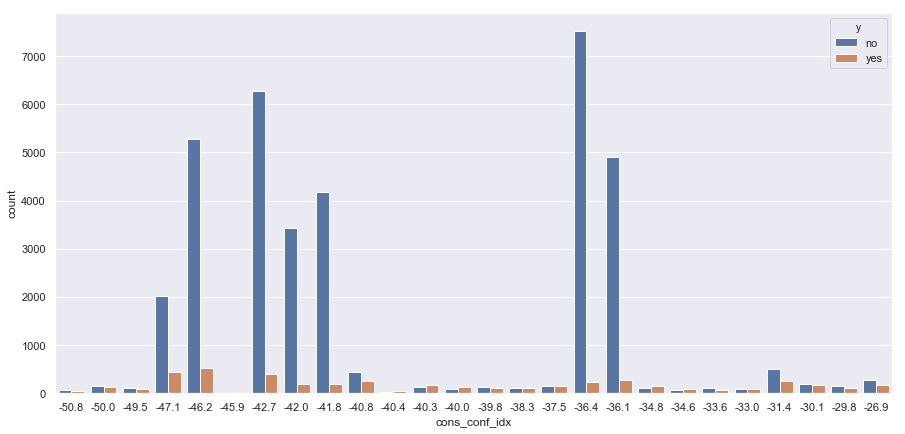

In [16]:
plt.figure(figsize=(15,7))
sns.countplot(data=portDF, x='cons_conf_idx', hue='y')

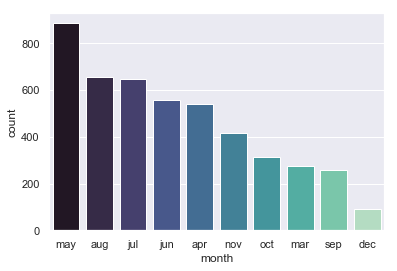

In [17]:
sns.countplot(data=portDFYes, x='month', order = portDFYes.month.value_counts().index, palette='mako')

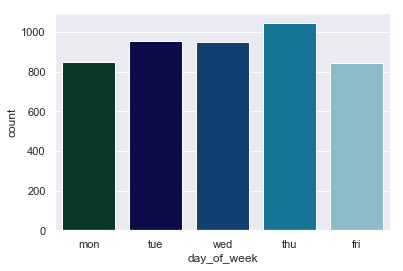

In [18]:
sns.countplot(data=portDFYes, x='day_of_week', palette='ocean')

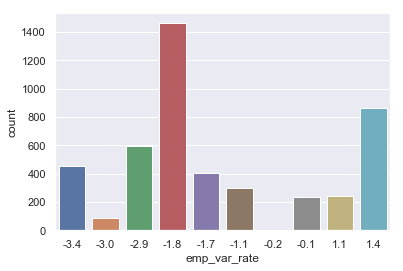

In [19]:
sns.countplot(data=portDFYes, x='emp_var_rate')

In [20]:
#Binning cons_price_idx using qcut into 3 major bins so that now we can have a clear analysis of customer decision  
#and their corresponding CPI values
portDF['binsCPI'] = pd.qcut(portDF['cons_price_idx'],q=3, precision =4)
portDF['binsCPI'] = portDF['binsCPI'].apply(lambda x: pd.Interval(left = float(round(x.left, 3)), \
                                                                  right = float(round(x.right, 3))))

In [21]:
#Binning Consumer COnfidence Index as well so that we can group them and have clear picture
portDF['binsCCI'] = pd.qcut(portDF['cons_conf_idx'],q= 6)
portDF['binsCCI'] = portDF['binsCCI'].apply(lambda x: pd.Interval(left = float(round(x.left, 3)), \
                                                                  right = float(round(x.right, 3))))

In [22]:
portDF['binsEURO'] = pd.qcut(portDF['euribor3m'],q= 10)
portDF['binsEURO'] = portDF['binsEURO'].apply(lambda x: pd.Interval(left = float(round(x.left, 3)), \
                                                                  right = float(round(x.right, 3))))

In [23]:
portDF['binsEmpNo'] = pd.qcut(portDF['nr_employed'],q= 2)
portDF['binsEmpNo'] = portDF['binsEmpNo'].apply(lambda x: pd.Interval(left = float(round(x.left, 3)), \
                                                                  right = float(round(x.right, 3))))

In [24]:
portDF['binsEmpRate'] = pd.qcut(portDF['emp_var_rate'],q= 2)
portDF['binsEmpRate'] = portDF['binsEmpRate'].apply(lambda x: pd.Interval(left = float(round(x.left, 3)), \
                                                                  right = float(round(x.right, 3))))

In [25]:
portDF['binDURA'] = pd.qcut(portDF['duration'],q= 10)
portDF['binDURA'] = portDF['binDURA'].apply(lambda x: pd.Interval(left = float(round(x.left, 3)), \
                                                                  right = float(round(x.right, 3))))

In [26]:
portDF.binsEmpRate.value_counts()

(-3.401, 1.1]    24954
(1.1, 1.4]       16234
Name: binsEmpRate, dtype: int64

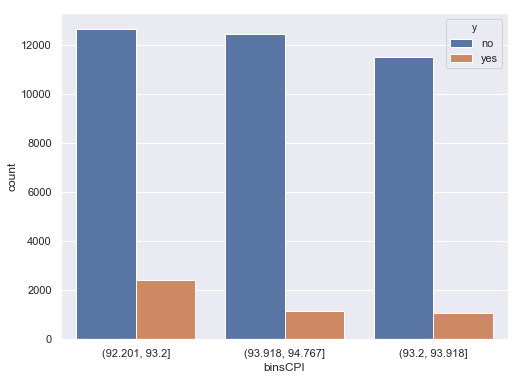

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(data=portDF, x='binsCPI', hue='y', order= portDF.binsCPI.value_counts().index)
# By seeing the below graph we can deduce that lower the CPI higher the deposit purchase

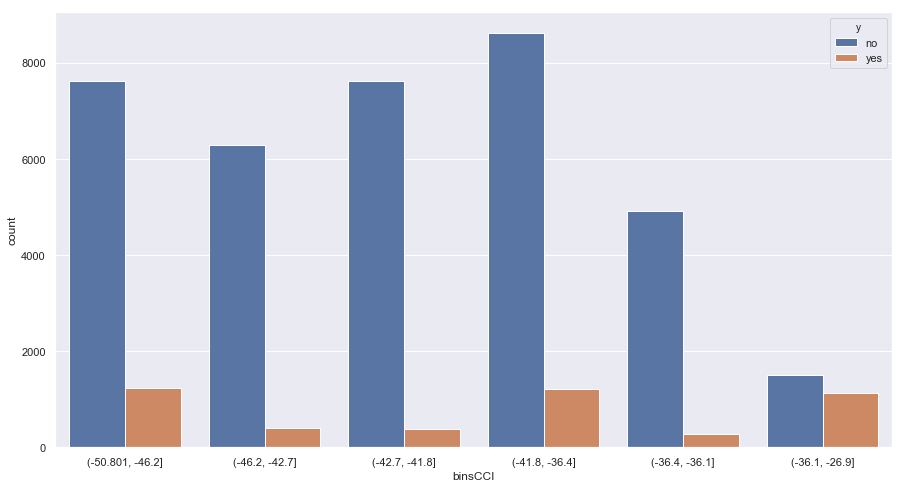

In [28]:
plt.figure(figsize=(15,8))
sns.countplot(data=portDF, x='binsCCI', hue='y')

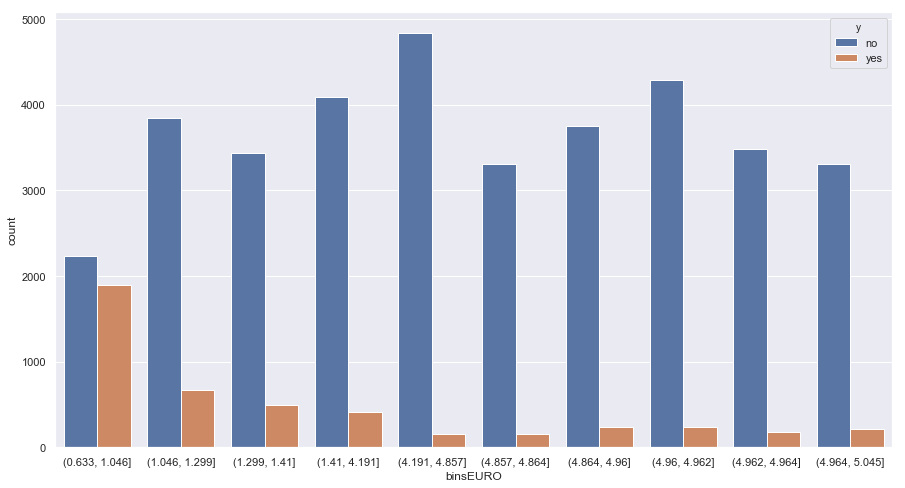

In [29]:
plt.figure(figsize=(15,8))
sns.countplot(data=portDF, x='binsEURO', hue='y')
#Below graph clearly indicates that as EuroBor rate increases subscription to deposit decreases

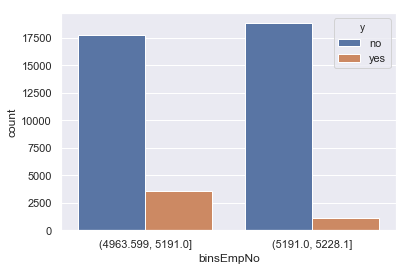

In [30]:
sns.countplot(data=portDF, x='binsEmpNo', hue='y')
#Employee efficiency is high when employee count is maintained below 5200. 
#More the number of employees less the total number of calls and less yeses

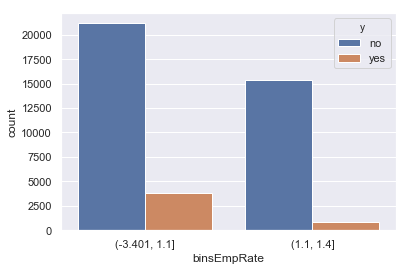

In [31]:
sns.countplot(data=portDF, x='binsEmpRate', hue='y')
#Less the employment variation rate more the deposit purchase. 
#When employment disturbance is there in the market then depoist purchase is less.

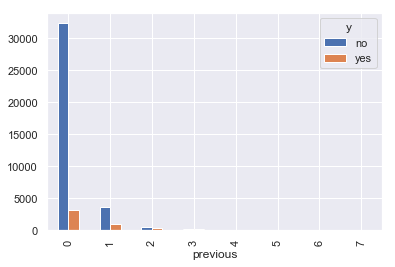

In [32]:
portDF.groupby(by = ['previous','y'])['y'].count().unstack().plot.bar()
#Through this we can conclude that maximum results are achieved with new callers and may be up to 3 calls people
#respond to deposit subscription. 4 calls and above, people just dont care. So calls may be limited up to 3 times 
#to a particular customer

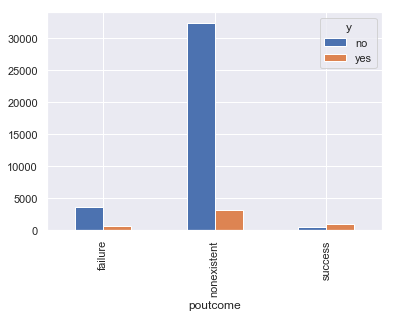

In [33]:
portDF.groupby(by = ['poutcome','y'])['y'].count().unstack().plot.bar()

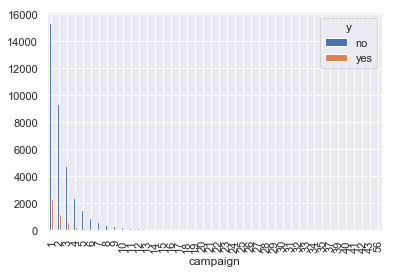

In [34]:
portDF.groupby(by = ['campaign','y'])['y'].count().unstack().plot.bar()
#During this campaign, up to 7 calls, there is some response from customer. Above 7 calls, no significant impact. 
#As a practice, we may limit no of calls up to 5

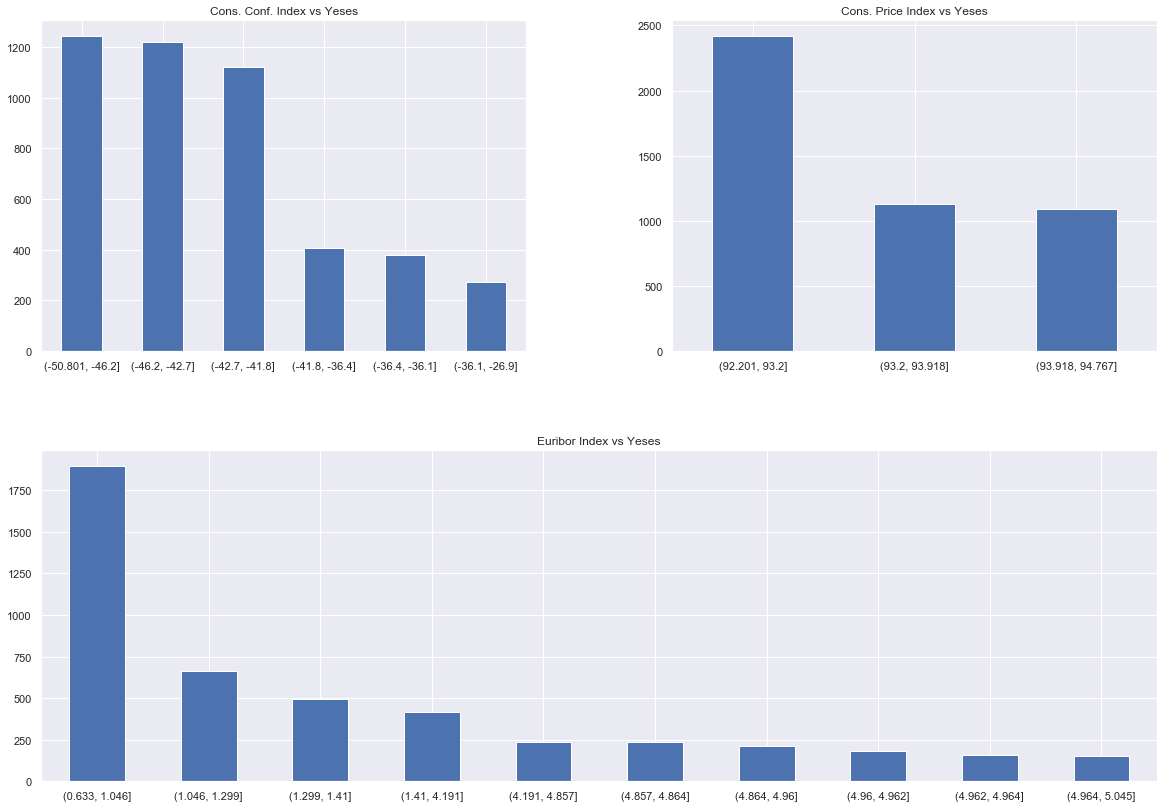

In [35]:
fig = plt.figure(figsize=(20,14))

plt.subplot2grid((2,2),(0,0))
ax1  = portDF.loc[portDF.y == 'yes'].binsCCI.value_counts(sort=True).plot.bar(rot=0, color="b")
ax1.set_xticklabels([c for c in portDF.binsCCI.cat.categories])
ax1.set_title('Cons. Conf. Index vs Yeses')

plt.subplot2grid((2,2),(0,1))
ax2 = portDF.loc[portDF.y == 'yes'].binsCPI.value_counts(sort=True).plot.bar(rot=0, color="b")
ax2.set_xticklabels([c for c in portDF.binsCPI.cat.categories])
ax2.set_title('Cons. Price Index vs Yeses')

plt.subplot2grid((2,2),(1,0),colspan=2)
ax3 = portDF.loc[portDF.y == 'yes'].binsEURO.value_counts(sort=True).plot.bar(rot=0, color="b")
ax3.set_xticklabels([c for c in portDF.binsEURO.cat.categories])
ax3.set_title('Euribor Index vs Yeses')


plt.subplots_adjust(hspace =.3, wspace =.3)

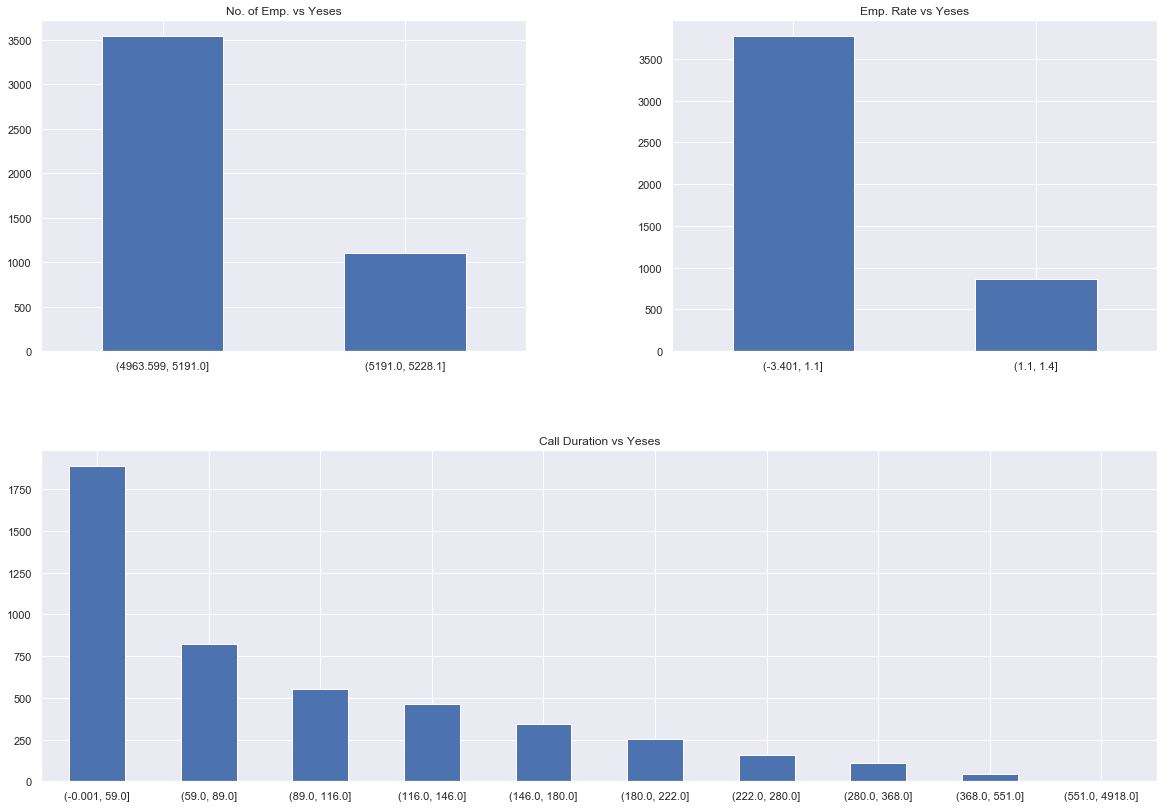

In [36]:
fig = plt.figure(figsize=(20,14))

plt.subplot2grid((2,2),(0,0))
ax4 = portDF.loc[portDF.y == 'yes'].binsEmpNo.value_counts(sort=True).plot.bar(rot=0, color="b")
ax4.set_xticklabels([c for c in portDF.binsEmpNo.cat.categories])
ax4.set_title('No. of Emp. vs Yeses')

plt.subplot2grid((2,2),(0,1))
ax5 = portDF.loc[portDF.y == 'yes'].binsEmpRate.value_counts(sort=True).plot.bar(rot=0, color="b")
ax5.set_xticklabels([c for c in portDF.binsEmpRate.cat.categories])
ax5.set_title('Emp. Rate vs Yeses')

plt.subplot2grid((2,2),(1,0),colspan=2)
ax6 = portDF.loc[portDF.y == 'yes'].binDURA.value_counts(sort=True).plot.bar(rot=0, color="b")
ax6.set_xticklabels([c for c in portDF.binDURA.cat.categories])
ax6.set_title('Call Duration vs Yeses')

plt.subplots_adjust(hspace =.3, wspace =.3)

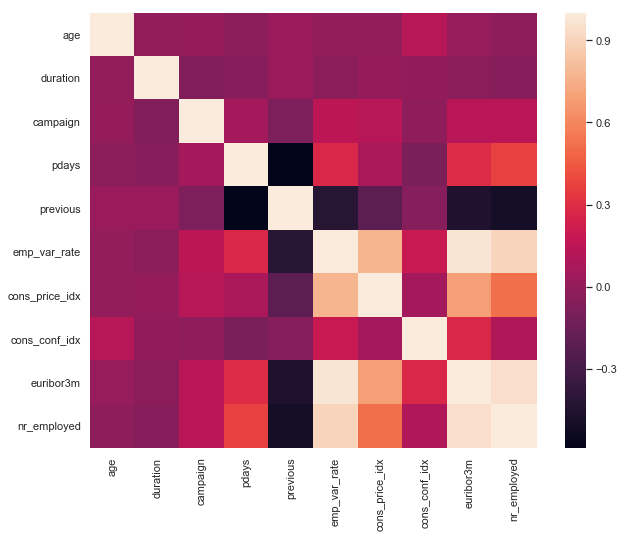

In [37]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(portDF.corr())

In [38]:
portDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 27 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null object
binsCPI           41188 non-null category
binsCCI  

In [39]:
# Now we can drop all the indices as we have already binned them
portDF.drop(columns=['emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed'],axis=1,inplace=True)

In [40]:
portDF.groupby(['job'])[['y']].count().reset_index().sort_values(['y'], ascending=False)

,job,y
0,admin.,10422
1,blue-collar,9254
9,technician,6743
7,services,3969
4,management,2924
5,retired,1720
2,entrepreneur,1456
6,self-employed,1421
3,housemaid,1060
10,unemployed,1014


In [41]:
#Changing Unknown employment type to unemployed
portDF['job'] = portDF['job'].apply(lambda x: 'unemployed' if x=='unknown' else x)

In [42]:
print(portDF.default.unique())
print(portDF.housing.unique())
print(portDF.loan.unique())
print(portDF.education.unique())
print(portDF.marital.unique())
print(portDF.contact.unique())

['no' 'unknown' 'yes']
['no' 'yes' 'unknown']
['no' 'yes' 'unknown']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
['married' 'single' 'divorced' 'unknown']
['telephone' 'cellular']


In [43]:
#Lets drop non-necessary columns before one hot encoding
portDF.drop(columns=['pdays','previous','poutcome'],axis=1,inplace=True)
portDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
age            41188 non-null int64
job            41188 non-null object
marital        41188 non-null object
education      41188 non-null object
default        41188 non-null object
housing        41188 non-null object
loan           41188 non-null object
contact        41188 non-null object
month          41188 non-null object
day_of_week    41188 non-null object
duration       41188 non-null int64
campaign       41188 non-null int64
y              41188 non-null object
binsCPI        41188 non-null category
binsCCI        41188 non-null category
binsEURO       41188 non-null category
binsEmpNo      41188 non-null category
binsEmpRate    41188 non-null category
binDURA        41188 non-null category
dtypes: category(6), int64(3), object(10)
memory usage: 4.3+ MB


In [44]:
cat_cols = list(portDF.select_dtypes(['object','category']).columns.values)
num_cols = list(portDF.select_dtypes(['int64','float64']).columns.values)
print(len(num_cols),len(cat_cols))

3 16


In [45]:
portDFCat = portDF[cat_cols]
portDFNum = portDF[num_cols]

In [46]:
portDFCat = pd.get_dummies(portDFCat)

In [47]:
portDFCat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 84 columns):
job_admin.                       41188 non-null uint8
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid                    41188 non-null uint8
job_management                   41188 non-null uint8
job_retired                      41188 non-null uint8
job_self-employed                41188 non-null uint8
job_services                     41188 non-null uint8
job_student                      41188 non-null uint8
job_technician                   41188 non-null uint8
job_unemployed                   41188 non-null uint8
marital_divorced                 41188 non-null uint8
marital_married                  41188 non-null uint8
marital_single                   41188 non-null uint8
marital_unknown                  41188 non-null uint8
education_basic.4y               41188 non-null uint8
education_basic.6y         

In [48]:
portDF = pd.concat([portDF,pd.get_dummies(portDF['job'],prefix='jobtype')],axis=1)
portDF = pd.concat([portDF,pd.get_dummies(portDF['marital'],prefix='mar')],axis=1)
portDF = pd.concat([portDF,pd.get_dummies(portDF['education'],prefix='edu')],axis=1)
portDF = pd.concat([portDF,pd.get_dummies(portDF['default'],prefix='def')],axis=1)
portDF = pd.concat([portDF,pd.get_dummies(portDF['housing'],prefix='hsng')],axis=1)
portDF = pd.concat([portDF,pd.get_dummies(portDF['loan'],prefix='loan')],axis=1)
portDF = pd.concat([portDF,pd.get_dummies(portDF['contact'],prefix='contact')],axis=1)
portDF = pd.concat([portDF,pd.get_dummies(portDF['binsCPI'],prefix='cpi')],axis=1)
portDF = pd.concat([portDF,pd.get_dummies(portDF['binsCCI'],prefix='cci')],axis=1)
portDF = pd.concat([portDF,pd.get_dummies(portDF['binsEURO'],prefix='euri')],axis=1)
portDF = pd.concat([portDF,pd.get_dummies(portDF['binsEmpRate'],prefix='emprate')],axis=1)
portDF = pd.concat([portDF,pd.get_dummies(portDF['binsEmpNo'],prefix='empno')],axis=1)
portDF = pd.concat([portDF,pd.get_dummies(portDF['binDURA'],prefix='dura')],axis=1)

In [49]:
portDF.drop(['job'],axis=1,inplace=True)
portDF.drop(['marital'],axis=1,inplace=True)
portDF.drop(['education'],axis=1,inplace=True)
portDF.drop(['default'],axis=1,inplace=True)
portDF.drop(['housing'],axis=1,inplace=True)
portDF.drop(['loan'],axis=1,inplace=True)
portDF.drop(['contact'],axis=1,inplace=True)
portDF.drop(['binsCPI'],axis=1,inplace=True)
portDF.drop(['binsCCI'],axis=1,inplace=True)
portDF.drop(['binsEURO'],axis=1,inplace=True)
portDF.drop(['binsEmpRate'],axis=1,inplace=True)
portDF.drop(['binsEmpNo'],axis=1,inplace=True)
portDF.drop(['binDURA'],axis=1,inplace=True)
portDF.drop(['duration'],axis=1,inplace=True)
portDF.drop(['month'],axis=1,inplace=True)
portDF.drop(['day_of_week'],axis=1,inplace=True)

In [50]:
portDF.y.unique()

array(['no', 'yes'], dtype=object)

In [51]:
portDF['y'] = portDF['y'].apply(lambda x: 1 if x=='yes' else 0)

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(portDF)
portDF_sc = sc.transform(portDF)

In [53]:
portDF_sc

array([[ 1.53303429, -0.56592197, -0.35630932, ..., -0.33262249,
        -0.33329736, -0.33266751],
       [ 1.62899323, -0.56592197, -0.35630932, ..., -0.33262249,
        -0.33329736, -0.33266751],
       [-0.29018564, -0.56592197, -0.35630932, ..., -0.33262249,
        -0.33329736, -0.33266751],
       ...,
       [ 1.53303429, -0.20490853, -0.35630932, ..., -0.33262249,
        -0.33329736, -0.33266751],
       [ 0.38152696, -0.56592197,  2.80655022, ..., -0.33262249,
         3.00032376, -0.33266751],
       [ 3.26029527,  0.15610492, -0.35630932, ..., -0.33262249,
        -0.33329736, -0.33266751]])

In [54]:
X = portDF.loc[:,portDF.columns != 'y']
X.head()

,age,campaign,jobtype_admin.,jobtype_blue-collar,jobtype_entrepreneur,jobtype_housemaid,jobtype_management,jobtype_retired,jobtype_self-employed,jobtype_services,jobtype_student,jobtype_technician,jobtype_unemployed,mar_divorced,mar_married,mar_single,mar_unknown,edu_basic.4y,edu_basic.6y,edu_basic.9y,edu_high.school,edu_illiterate,edu_professional.course,edu_university.degree,edu_unknown,def_no,def_unknown,def_yes,hsng_no,hsng_unknown,hsng_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,"cpi_(92.201, 93.2]","cpi_(93.2, 93.918]","cpi_(93.918, 94.767]","cci_(-50.801, -46.2]","cci_(-46.2, -42.7]","cci_(-42.7, -41.8]","cci_(-41.8, -36.4]","cci_(-36.4, -36.1]","cci_(-36.1, -26.9]","euri_(0.633, 1.046]","euri_(1.046, 1.299]","euri_(1.299, 1.41]","euri_(1.41, 4.191]","euri_(4.191, 4.857]","euri_(4.857, 4.864]","euri_(4.864, 4.96]","euri_(4.96, 4.962]","euri_(4.962, 4.964]","euri_(4.964, 5.045]","emprate_(-3.401, 1.1]","emprate_(1.1, 1.4]","empno_(4963.599, 5191.0]","empno_(5191.0, 5228.1]","dura_(-0.001, 59.0]","dura_(59.0, 89.0]","dura_(89.0, 116.0]","dura_(116.0, 146.0]","dura_(146.0, 180.0]","dura_(180.0, 222.0]","dura_(222.0, 280.0]","dura_(280.0, 368.0]","dura_(368.0, 551.0]","dura_(551.0, 4918.0]"
0,56,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
1,57,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
2,37,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
3,40,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
4,56,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0


In [55]:
y = portDF.loc[:,portDF.columns == 'y']
y.head(100)

,y
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


<a id=xysplit></a>
#### X & y Split

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [100]:
scaler = StandardScaler().fit(X_train)
X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), index=X_test.index, columns=X.columns)

In [58]:
y_train

,y
11196,0
15464,0
25538,0
13108,0
17088,1
38106,1
37099,0
4895,0
17077,0
7305,0


In [59]:
print(X_train.shape)
print(y_train.shape)

(28831, 69)
(28831, 1)


In [60]:
print(X_test.shape)
print(y_test.shape)

(12357, 69)
(12357, 1)


<a id=beforepca></a>
### Before PCA

<a id=bpca_rfc></a>
#### Random Forest Classifier

In [61]:
import time
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state =0)

start_time = time.time()
rfc.fit(X_train,y_train)
end_time = time.time()

time1 = end_time-start_time
print(time1)

C:\Users\Venkat.Mohan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Venkat.Mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.6718137264251709


In [62]:
print('RF Classify starts now',dt.now())
starttime = dt.now()

y_pred_trainlog = rfc.predict(X_train)
y_pred_testlog = rfc.predict(X_test)

print('RF Classify ended ',dt.now() - starttime)

RF Classify starts now 2020-01-12 11:23:03.345322
RF Classify ended  0:00:00.171819


In [63]:
#Using Accuracy score of classification
from sklearn.metrics import accuracy_score
print('Accuracy score for test data with Random Forest is:', accuracy_score(y_test,y_pred_testlog))
print('Accuracy score for train data with Random Forest is:', accuracy_score(y_train,y_pred_trainlog))

Accuracy score for test data with Random Forest is: 0.8956057295460063
Accuracy score for train data with Random Forest is: 0.9909125593978704


In [64]:
#Using Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_log = pd.DataFrame(confusion_matrix(y_test, y_pred_testlog))

print('Random Forest Confusion Matrix')
print(confusion_matrix_log)

Random Forest Confusion Matrix
       0    1
0  10538  406
1    884  529


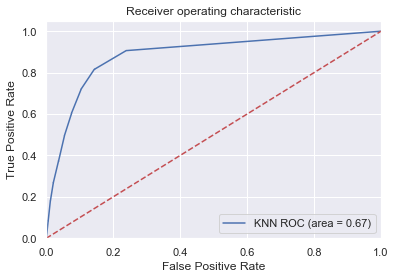

In [65]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

rfc_roc_auc = roc_auc_score(y_test, rfc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='KNN ROC (area = %0.2f)' % rfc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RFC_ROC')

plt.show()

<a id=bpca_logreg></a>
#### Log Reg

In [66]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state= 42)
logreg.fit(X_train,y_train)

C:\Users\Venkat.Mohan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Venkat.Mohan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
print('Log Reg starts now',dt.now())
starttime = dt.now()

y_pred_trainlog = logreg.predict(X_train)
y_pred_testlog = logreg.predict(X_test)

print('Log Reg ended ',dt.now() - starttime)

Log Reg starts now 2020-01-12 11:23:06.563721
Log Reg ended  0:00:00.124987


In [68]:
#Using Accuracy score of classification
from sklearn.metrics import accuracy_score
print('Accuracy score for test data with Log Reg is:', accuracy_score(y_test,y_pred_testlog))
print('Accuracy score for train with Log Reg data is:', accuracy_score(y_train,y_pred_trainlog))

Accuracy score for test data with Log Reg is: 0.9075827466213482
Accuracy score for train with Log Reg data is: 0.9040269154729285


In [69]:
#Using Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_log = pd.DataFrame(confusion_matrix(y_test, y_pred_testlog))

print('Log Reg Confusion Matrix')
print(confusion_matrix_log)

Log Reg Confusion Matrix
       0    1
0  10613  331
1    811  602


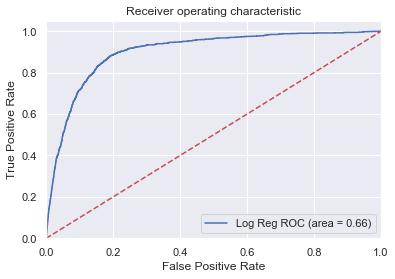

In [171]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

log_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Log Reg ROC (area = %0.2f)' % log_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LogReg_ROC')

plt.show()

<a id=bpca_gnb></a>
#### Gaussian NB

In [71]:
from sklearn.naive_bayes import GaussianNB

gnbClf = GaussianNB()

In [72]:
import time

start_time = time.time()
gnbClf.fit(X_train,y_train)
end_time = time.time()

time1 = end_time-start_time
print(time1)

0.12492585182189941


C:\Users\Venkat.Mohan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:
print('GNB Classify starts now',dt.now())
starttime = dt.now()

y_pred_train_gnb = gnbClf.predict(X_train)
y_pred_test_gnb = gnbClf.predict(X_test)

print('GNB Classify ended ',dt.now() - starttime)

GNB Classify starts now 2020-01-12 11:23:07.969743
GNB Classify ended  0:00:00.265598


In [74]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data with Gaussian NB is:', accuracy_score(y_test,y_pred_test_gnb))
print('Accuracy score for train data with Gaussian NB is:', accuracy_score(y_train,y_pred_train_gnb))

Accuracy score for test data with Gaussian NB is: 0.8856518572469045
Accuracy score for train data with Gaussian NB is: 0.6271027713225348


In [75]:
#Using Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_gnb = pd.DataFrame(confusion_matrix(y_test, y_pred_test_gnb))

print('Log Reg Confusion Matrix')
print(confusion_matrix_gnb)

Log Reg Confusion Matrix
       0  1
0  10944  0
1   1413  0


In [76]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test_gnb))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10944
           1       0.00      0.00      0.00      1413

    accuracy                           0.89     12357
   macro avg       0.44      0.50      0.47     12357
weighted avg       0.78      0.89      0.83     12357



C:\Users\Venkat.Mohan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Venkat.Mohan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Venkat.Mohan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


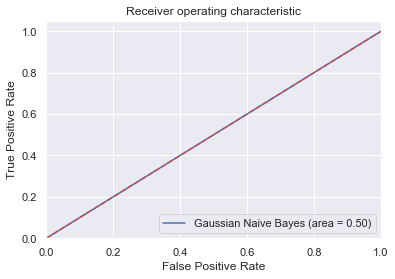

In [77]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

gnb_roc_auc = roc_auc_score(y_test, gnbClf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gnbClf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Gaussian Naive Bayes (area = %0.2f)' % gnb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('GNB_ROC')

plt.show()

<a id=bpca_cvdt></a>
#### Decision Tree and Grid Search CV

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [79]:
dtClf = tree.DecisionTreeClassifier(random_state=42)

tree_para = [{'criterion':['entropy'], 'min_samples_split': [2,3,4,5]
             }]

cvClf = GridSearchCV(dtClf,tree_para, cv=10)

In [80]:
from datetime import datetime as dt

print('Grid Search CV started',dt.now())

start_time = dt.now()
cvClf.fit(X_train,y_train)

print('Grid Search CV ended. Total Time', dt.now()- starttime)


Grid Search CV started 2020-01-12 11:23:09.344645
Grid Search CV ended. Total Time 0:00:17.185500


In [81]:
print('Grid Search CV prediction starts', dt.now())
starttime = dt.now()

y_pred_test_cv = cvClf.predict(X_test)
y_pred_train_cv = cvClf.predict(X_train)

print('Grid Search CV prediction starts ended. Total Time', dt.now()- starttime)

Grid Search CV prediction starts 2020-01-12 11:23:25.170868
Grid Search CV prediction starts ended. Total Time 0:00:00.031252


In [82]:
#Using Accuracy score of classification
from sklearn.metrics import accuracy_score
print('Accuracy score for test data with Random Forest is:', accuracy_score(y_test,y_pred_test_cv))
print('Accuracy score for train data with Random Forest is:', accuracy_score(y_train,y_pred_train_cv))

Accuracy score for test data with Random Forest is: 0.8767500202314478
Accuracy score for train data with Random Forest is: 0.9796746557524887


In [83]:
#Using Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_cvDT = pd.DataFrame(confusion_matrix(y_test, y_pred_test_cv))

print('Decision Tree & GridSearch CV Confusion Matrix')
print(confusion_matrix_cvDT)

Decision Tree & GridSearch CV Confusion Matrix
       0    1
0  10209  735
1    788  625


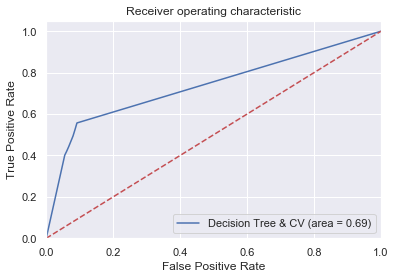

In [84]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

cvDT_roc_auc = roc_auc_score(y_test, cvClf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, cvClf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Decision Tree & CV (area = %0.2f)' % cvDT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('CVDT_ROC')

plt.show()

In [85]:
print(cvClf.best_params_)
print(cvClf.best_estimator_)

print(cvClf.best_score_)

{'criterion': 'entropy', 'min_samples_split': 5}
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')
0.8816551628455482


<a id=bpca_knn></a>
#### KNN Try

In [101]:
from sklearn.neighbors import KNeighborsClassifier

In [102]:
knnClf = KNeighborsClassifier()

In [103]:
knnClf.fit(X_train, y_train)

C:\Users\Venkat.Mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [104]:
y_preds = knnClf.predict(X_test)

In [105]:
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(y_test,y_preds)
print('Accuracy score for the KNN model:', knn_accuracy)

Accuracy score for the KNN model: 0.8956057295460063


In [106]:
#Using Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_knn = pd.DataFrame(confusion_matrix(y_test, y_preds))

print('Decision Tree & GridSearch CV Confusion Matrix')
print(confusion_matrix_knn)

Decision Tree & GridSearch CV Confusion Matrix
       0    1
0  10508  436
1    854  559


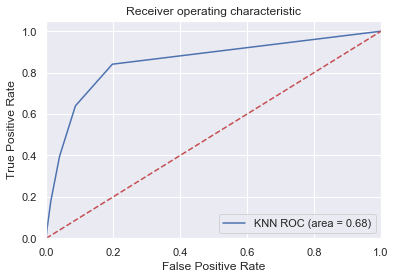

In [108]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

knn_roc_auc = roc_auc_score(y_test, y_preds)
fpr, tpr, thresholds = roc_curve(y_test, knnClf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='KNN ROC (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')

plt.show()

<a id=bpca_svc></a>
#### SVC Try

In [115]:
from sklearn.svm import SVC
svcClf = SVC(random_state=42,probability=True)

In [116]:
import time

start_time = time.time()
svcClf.fit(X_train,y_train)
end_time = time.time()

time1 = end_time-start_time
print(time1)


C:\Users\Venkat.Mohan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


314.1500492095947


In [111]:
print('SVC Classify starts now',dt.now())
starttime = dt.now()

y_pred_train_svc = svcClf.predict(X_train)
y_pred_test_svc = svcClf.predict(X_test)

print('SVC Classify ended ',dt.now() - starttime)

SVC Classify starts now 2020-01-12 11:47:41.330025
SVC Classify ended  0:00:42.635493


In [112]:
#Using Accuracy score of classification
from sklearn.metrics import accuracy_score
print('Accuracy score for test data with Random Forest is:', accuracy_score(y_test,y_pred_test_svc))
print('Accuracy score for train data with Random Forest is:', accuracy_score(y_train,y_pred_train_svc))

Accuracy score for test data with Random Forest is: 0.904750343934612
Accuracy score for train data with Random Forest is: 0.9159238319864035


In [113]:
#Using Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_svc = pd.DataFrame(confusion_matrix(y_test, y_pred_test_svc))

print('SVC Confusion matrix Confusion Matrix')
print(confusion_matrix_svc)

SVC Confusion matrix Confusion Matrix
       0    1
0  10595  349
1    828  585


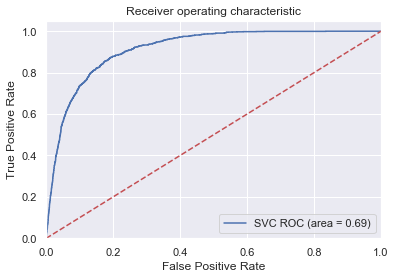

In [117]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

svc_roc_auc = roc_auc_score(y_test, y_pred_test_svc)
fpr, tpr, thresholds = roc_curve(y_test, svcClf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='SVC ROC (area = %0.2f)' % svc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SVC_ROC')

plt.show()

<a id = pcatry></a>
### PCA Try

In [118]:
from sklearn.decomposition import PCA
pca = PCA(0.99).fit(X)

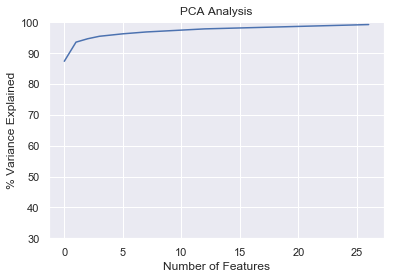

In [119]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [120]:
print('%d components explain 99%% of the variation in data' % pca.n_components_)

27 components explain 99% of the variation in data


In [121]:
pca = PCA(n_components=27, random_state = 0)
pca.fit(X)
X_27 = pca.transform(X)
print(X_27.shape)

(41188, 27)


In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_27, y, test_size=0.30, random_state=1)

In [123]:
print(X_train.shape)
print(X_test.shape)

(28831, 27)
(12357, 27)


<a id=apca_logreg></a>
#### Log Reg _ After PCA

In [124]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state= 42)
logreg.fit(X_train,y_train)

C:\Users\Venkat.Mohan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Venkat.Mohan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [125]:
print('Log Reg starts now',dt.now())
starttime = dt.now()

y_pred_train_log = logreg.predict(X_train)
y_pred_test_log = logreg.predict(X_test)

print('Log Reg ended ',dt.now() - starttime)

Log Reg starts now 2020-01-12 12:39:24.847231
Log Reg ended  0:00:00.015621


In [126]:
#Using Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_log = pd.DataFrame(confusion_matrix(y_test, y_pred_testlog))

print('Log Reg Confusion Matrix')
print(confusion_matrix_log)

Log Reg Confusion Matrix
       0    1
0  10613  331
1    811  602


In [127]:
#Using Accuracy score of classification
from sklearn.metrics import accuracy_score
print('Accuracy score for test data with Log Reg is:', accuracy_score(y_test,y_pred_testlog))
print('Accuracy score for train with Log Reg data is:', accuracy_score(y_train,y_pred_trainlog))

Accuracy score for test data with Log Reg is: 0.9075827466213482
Accuracy score for train with Log Reg data is: 0.9040269154729285


In [128]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_testlog))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10944
           1       0.65      0.43      0.51      1413

    accuracy                           0.91     12357
   macro avg       0.79      0.70      0.73     12357
weighted avg       0.90      0.91      0.90     12357



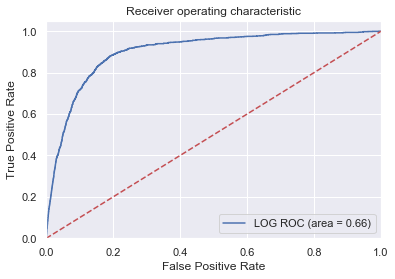

In [129]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

log_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='LOG ROC (area = %0.2f)' % log_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')

plt.show()

<a id = apca_rfc></a>
#### Random Forest _ After PCA

In [130]:
import time
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state =0)

start_time = time.time()
rfc.fit(X_train,y_train)
end_time = time.time()

time1 = end_time-start_time
print(time1)

C:\Users\Venkat.Mohan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Venkat.Mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


2.7966501712799072


In [131]:
print('RF Classify starts now',dt.now())
starttime = dt.now()

y_pred_train_rfc = rfc.predict(X_train)
y_pred_test_rfc = rfc.predict(X_test)

print('RF Classify ended ',dt.now() - starttime)

RF Classify starts now 2020-01-12 12:39:28.440692
RF Classify ended  0:00:00.140612


In [132]:
#Using Accuracy score of classification
from sklearn.metrics import accuracy_score
print('Accuracy score for test data with Random Forest is:', accuracy_score(y_test,y_pred_test_rfc))
print('Accuracy score for train data with Random Forest is:', accuracy_score(y_train,y_pred_train_rfc))

Accuracy score for test data with Random Forest is: 0.896091284292304
Accuracy score for train data with Random Forest is: 0.9912594082758143


In [133]:
#Using Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_rfc = pd.DataFrame(confusion_matrix(y_test, y_pred_test_rfc))

print('Random Forest Confusion Matrix')
print(confusion_matrix_rfc)

Random Forest Confusion Matrix
       0    1
0  10547  397
1    887  526


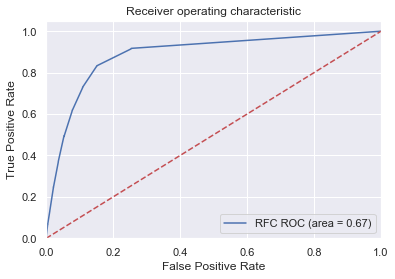

In [134]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

rfc_roc_auc = roc_auc_score(y_test, rfc.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='RFC ROC (area = %0.2f)' % rfc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RFC_ROC')

plt.show()

<a id=apca_svc></a>
#### SVC _ After PCA

In [142]:
from sklearn.svm import SVC

svcClf = SVC(random_state=42,probability=True)

In [143]:
import time

start_time = time.time()
svcClf.fit(X_train,y_train)
end_time = time.time()

time1 = end_time-start_time
print(time1)

C:\Users\Venkat.Mohan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Venkat.Mohan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


204.42894530296326


In [144]:
print('SVC Classify starts now',dt.now())
starttime = dt.now()

y_pred_train_svc = svcClf.predict(X_train)
y_pred_test_svc = svcClf.predict(X_test)

print('SVC Classify ended ',dt.now() - starttime)

SVC Classify starts now 2020-01-12 12:44:52.163274
SVC Classify ended  0:00:21.045187


In [145]:
#Using Accuracy score of classification
from sklearn.metrics import accuracy_score
print('Accuracy score for test data with Random Forest is:', accuracy_score(y_test,y_pred_test_svc))
print('Accuracy score for train data with Random Forest is:', accuracy_score(y_train,y_pred_train_svc))

Accuracy score for test data with Random Forest is: 0.896091284292304
Accuracy score for train data with Random Forest is: 0.9030904235024799


In [146]:
#Using Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_svc = pd.DataFrame(confusion_matrix(y_test, y_pred_test_svc))

print('SVC Confusion matrix Confusion Matrix')
print(confusion_matrix_svc)

SVC Confusion matrix Confusion Matrix
       0    1
0  10826  118
1   1166  247


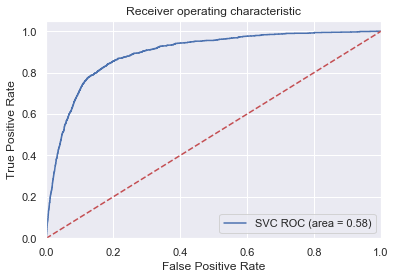

In [147]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

svc_roc_auc = roc_auc_score(y_test, svcClf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, svcClf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='SVC ROC (area = %0.2f)' % svc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SVC_ROC')


plt.show()

<a id=apca_cvdt></a>
#### Grid Search CV & DT _ After PCA

In [148]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [149]:
dtClf = tree.DecisionTreeClassifier(random_state=42)

tree_para = [{'criterion':['gini','entropy'], 'max_depth':[4,6,8,10], 'max_leaf_nodes':[2,4,6,8,10]}]

cvClf = GridSearchCV(dtClf,tree_para, cv=5)

In [150]:
from datetime import datetime as dt

print('Grid Search CV started',dt.now())

start_time = dt.now()
cvClf.fit(X_train,y_train)

print('Grid Search CV ended. Total Time', dt.now()- starttime)

Grid Search CV started 2020-01-12 12:45:26.394904
Grid Search CV ended. Total Time 0:02:52.193940


In [151]:
print('Grid Search CV prediction starts', dt.now())
starttime = dt.now()

y_pred_test_cv = cvClf.predict(X_test)
y_pred_train_cv = cvClf.predict(X_train)

print('Grid Search CV prediction starts ended. Total Time', dt.now()- starttime)

Grid Search CV prediction starts 2020-01-12 12:47:44.372839
Grid Search CV prediction starts ended. Total Time 0:00:00.015606


In [152]:
#Using Accuracy score of classification
from sklearn.metrics import accuracy_score
print('Accuracy score for test data with Random Forest is:', accuracy_score(y_test,y_pred_test_cv))
print('Accuracy score for train data with Random Forest is:', accuracy_score(y_train,y_pred_train_cv))

Accuracy score for test data with Random Forest is: 0.8943109168892126
Accuracy score for train data with Random Forest is: 0.8952516388609483


In [153]:
#Using Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_cvDT = pd.DataFrame(confusion_matrix(y_test, y_pred_test_cv))

print('Decision Tree & GridSearch CV Confusion Matrix')
print(confusion_matrix_cvDT)

Decision Tree & GridSearch CV Confusion Matrix
       0    1
0  10664  280
1   1026  387


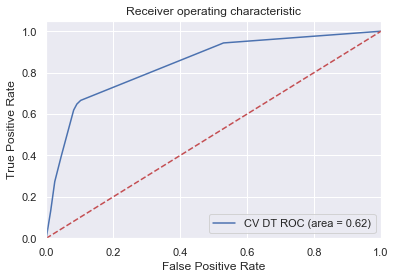

In [154]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

cvdt_roc_auc = roc_auc_score(y_test, cvClf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, cvClf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='CV DT ROC (area = %0.2f)' % cvdt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('CV DT_ROC')

plt.show()

<a id=apca_gnb></a>
#### Gaussian NB_ After PCA

In [155]:
from sklearn.naive_bayes import GaussianNB

In [156]:
gnbClf = GaussianNB()

In [157]:
import time

start_time = time.time()
gnbClf.fit(X_train,y_train)
end_time = time.time()

time1 = end_time-start_time
print(time1)

0.06243562698364258


C:\Users\Venkat.Mohan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [158]:
print('SVC Classify starts now',dt.now())
starttime = dt.now()

y_pred_train_gnb = gnbClf.predict(X_train)
y_pred_test_gnb = gnbClf.predict(X_test)

print('SVC Classify ended ',dt.now() - starttime)

SVC Classify starts now 2020-01-12 12:47:45.466483
SVC Classify ended  0:00:00.078118


In [159]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data with Gaussian NB is:', accuracy_score(y_test,y_pred_test_gnb))
print('Accuracy score for train data with Gaussian NB is:', accuracy_score(y_train,y_pred_train_gnb))

Accuracy score for test data with Gaussian NB is: 0.8799061260823825
Accuracy score for train data with Gaussian NB is: 0.8761749505740349


In [160]:
from sklearn.metrics import confusion_matrix
confusion_matrix_gnb = pd.DataFrame(confusion_matrix(y_test, y_pred_test_gnb))

print('Gaussian Naive Bayes Confusion Matrix')
print(confusion_matrix_gnb)

Gaussian Naive Bayes Confusion Matrix
      0    1
0  9969  975
1   509  904


In [161]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test_gnb))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93     10944
           1       0.48      0.64      0.55      1413

    accuracy                           0.88     12357
   macro avg       0.72      0.78      0.74     12357
weighted avg       0.90      0.88      0.89     12357



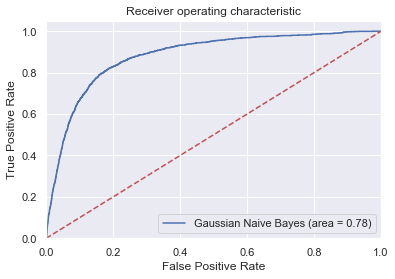

In [162]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

gnb_roc_auc = roc_auc_score(y_test, gnbClf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gnbClf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Gaussian Naive Bayes (area = %0.2f)' % gnb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('GNB_ROC')

plt.show()

<a id = apca_knn></a>
#### KNN _ After PCA

In [163]:
from sklearn.neighbors import KNeighborsClassifier
knnClf = KNeighborsClassifier(n_neighbors=1)
knnClf.fit(X_train, y_train)
y_pred_test = knnClf.predict(X_test)

C:\Users\Venkat.Mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [164]:
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(y_test,y_pred_test)
print('Accuracy score for the KNN model:', knn_accuracy)

Accuracy score for the KNN model: 0.860403010439427


In [165]:
#Using Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_knn = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

print('Decision Tree & GridSearch CV Confusion Matrix')
print(confusion_matrix_knn)

Decision Tree & GridSearch CV Confusion Matrix
       0    1
0  10126  818
1    907  506


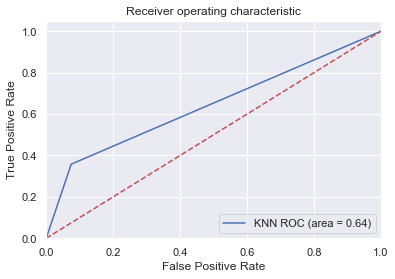

In [166]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

knn_roc_auc = roc_auc_score(y_test, knnClf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knnClf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='KNN ROC (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')

plt.show()

from sklearn.model_selection import cross_val_score

print('KNN Classify starts now',dt.now())
starttime = dt.now()

# creating list of K for KNN
k_list = list(range(1,25,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    print("Interation starts ",k)
    timestart = dt.now()
    
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    knn_cv.fit(X_train, y_train)
    y_pred_test = knn_cv.predict(X_test)
    cv_scores.append(accuracy_score(y_test,y_pred_test))
    matrix_result[k] = confusion_matrix(y_test,y_pred_test)
    print("Accuracy for iteration",k,"is",accuracy_score(y_test,y_pred_test))
    
    print("Confusion Matrix for iteration",k,"is",pd.DataFrame(confusion_matrix(y_test, y_pred_test)))
    print("Iteration Ended ",k," time taken ", dt.now()-timestart)

print('KNN Classify ended ',dt.now() - starttime)

with open('your_file.txt', 'w') as f:
    for item in matrix_result:
        f.write("%s\n" % item)

import numpy as np
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier


grid_param = {'n_neighbors': range(1, 25)}
knnClf = KNeighborsClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2)
clf = GridSearchCV(knnClf, grid_param, cv=cv, scoring='accuracy')
clf.fit(X_train, y_train)
print("Best Estimator: \n{}\n".format(clf.best_estimator_))
print("Best Parameters: \n{}\n".format(clf.best_params_))
print("Best Score: \n{}\n".format(clf.best_score_))

<a id=vbleimp></a>
#### Feature Importance

C:\Users\Venkat.Mohan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Venkat.Mohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


[0.1584345  0.0857213  0.0176617  0.01050025 0.00524159 0.00452925
 0.00968354 0.00864464 0.00641053 0.00935129 0.00579853 0.01350173
 0.00683854 0.01095602 0.0168218  0.01552813 0.00080095 0.00875956
 0.0062193  0.01062347 0.01597046 0.00038658 0.01162028 0.01643226
 0.00771318 0.00862486 0.00724187 0.         0.01832931 0.00210673
 0.01809784 0.01228354 0.0023222  0.01297487 0.0062686  0.0131962
 0.0060442  0.00524502 0.00507835 0.01464233 0.0009904  0.00139312
 0.00896132 0.00176253 0.02654924 0.08402069 0.00552035 0.00342855
 0.00523238 0.00907766 0.00271966 0.00243738 0.00234105 0.0018738
 0.00183045 0.00123206 0.0012187  0.00922888 0.00677147 0.0104973
 0.01162015 0.01143405 0.01130533 0.00766934 0.00711187 0.00933963
 0.01415801 0.01847763 0.12519166]


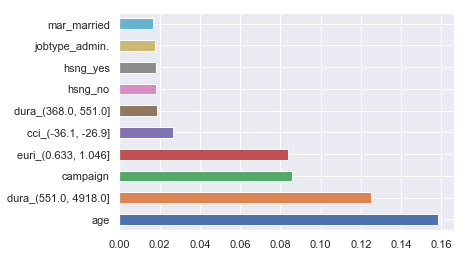

In [168]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

<a id=conclusion></a>
### Conclusion

After comparing all the results, we find that Decision Tree with Grid Search produces best results before implementing PCA, at 87.67% accurate and 69% ROC AUC. Also Precision and Recall scores are also good.

After implementing PCA, it is observed that Naive Bayes model outperforms all the other models, with 87.99% accuracy and very importantly 78% of ROC AUC. Even though, we had to sacrifice a little Precision score, all the other parameters are very convincing in GNB model. Hence we go with GNB with PCA model for classifying this dataset.